In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

matplotlib.rcParams.update({'font.size': 15})
plt.rcParams["font.family"] = "serif"

In [3]:
## Empirical Cumulative Distribution Function

# # A normal distribution with mean 5 and standard deviation 1.5
# mu, sigma = 5, 1.5
# x = np.arange(0, 10, 0.1)
# y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu)**2 / sigma**2)

# # Noisy data
# y1 = y + np.random.normal(0, 0.1, len(x))

# # Plot cumulative distribution function using cumsum
# plt.plot(x, y.cumsum(), label = 'Theoretical CDF')
# plt.scatter(x, y1.cumsum(), label = 'Empirical Distribution Function', color = 'red', s = 10)
# plt.xlabel('x')
# plt.ylabel('F(x)')
# plt.legend(fontsize = 10)
# plt.grid()
# # plt.savefig('empirical_cdf.png')

In [4]:
## Ordinary least squares vs weighted least squares

# # Exponential distribution with varying errors
# x = np.linspace(1, 5, 100)
# y = 5*x
# y_err = np.random.normal(0, 0.5, len(x))*y
# y_err = np.abs(y_err)
# y = y + y_err

# plt.errorbar(x, y, yerr = y_err, fmt = 'o', label = 'Data', markersize = 2, linewidth = 1)

# # Ordinary least squares and weighted least squares
# A = np.vstack([x, np.ones(len(x))]).T
# w = np.diag(1/y_err)
# theta = np.linalg.inv(A.T @ w @ A) @ A.T @ w @ y
# y_hat = A @ theta
# plt.plot(x, y_hat, label = 'Ordinary Least Squares', linewidth = 2)

# theta = np.linalg.inv(A.T @ A) @ A.T @ y
# y_hat = A @ theta
# plt.plot(x, y_hat, label = 'Weighted Least Squares', linewidth = 2)

# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(fontsize = 10, loc = 'upper left')
# plt.grid()
# # plt.savefig('ols_vs_wls.png')

In [5]:
## Lag plots and ACF

# # Lag plot and ACF for a noisy sinusoidal signal
# x = np.linspace(0, 100, 50)
# x_cl = np.linspace(0, 100, 1000)
# y_cl = np.sin(x_cl*np.pi/4)
# y = np.sin(x*np.pi/4) + np.random.normal(0, 0.1, len(x))

# fig, ax = plt.subplots(1, 1, figsize = (10, 7))
# ax.plot(x_cl, y_cl, color = 'red')
# ax.scatter(x, y, label = 'Data', s = 25)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.grid(True)
# # plt.savefig('sinusoidal_data.png')

# # First 9 Lag Plots
# fig, ax = plt.subplots(3, 3, figsize = (15, 15))
# for i in range(9):
#     ax[i//3, i%3].scatter(y[:-i-1], y[i+1:], s = 20)
#     ax[i//3, i%3].set_title(f'Lag = {i+1}')
# for a in ax.flatten():
#     a.grid(True)
#     a.set_xlabel('y(t)')
#     a.set_ylabel('y(t + lag)')
# plt.tight_layout()
# # plt.savefig('lag_plots.png')

# # ACF plot
# fig, ax = plt.subplots(1, 1, figsize = (10, 7))
# _ = ax.acorr(y, maxlags = 10, usevlines = True, normed = True, lw = 2)
# ax.set_xlabel('Lag')
# ax.set_xlim(0,10)
# ax.set_ylabel('ACF')
# ax.grid(True)
# # plt.savefig('acf.png')

In [6]:
## Fourier power spectrum

# # A double sine wave with noise
# x = np.linspace(0, 100, 1000)
# y = 2*np.sin(2*np.pi*x/10) + 3*np.sin(2*np.pi*x/5) + np.random.normal(0, 0.5, len(x))
# y_cl = 2*np.sin(2*np.pi*x/10) + 3*np.sin(2*np.pi*x/5)

# fig,ax = plt.subplots(1, 1, figsize = (10, 7))
# ax.plot(x, y_cl, color = 'red')
# ax.scatter(x, y, label = 'Data', s = 10)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_xlim(0, 50)
# ax.grid(True)
# # plt.savefig('double_sine_wave.png')

# # Fourier power spectrum
# yf = np.fft.fft(y)
# xf = np.fft.fftfreq(len(x), x[1] - x[0])
# xf = np.fft.fftshift(xf)
# yplot = np.fft.fftshift(np.abs(yf))

# fig, ax = plt.subplots(1, 1, figsize = (10, 7))
# ax.plot(xf, yplot, label = 'Fourier Power Spectrum', color = 'green')
# ax.set_yscale('log')
# ax.set_xlim(0, 0.5)
# # ax.set_ylim(1e-1, 1e3)
# ax.set_xlabel('Frequency')
# ax.set_ylabel('Power Spectrum')
# ax.grid(True)
# # plt.savefig('fourier_power_spectrum.png')

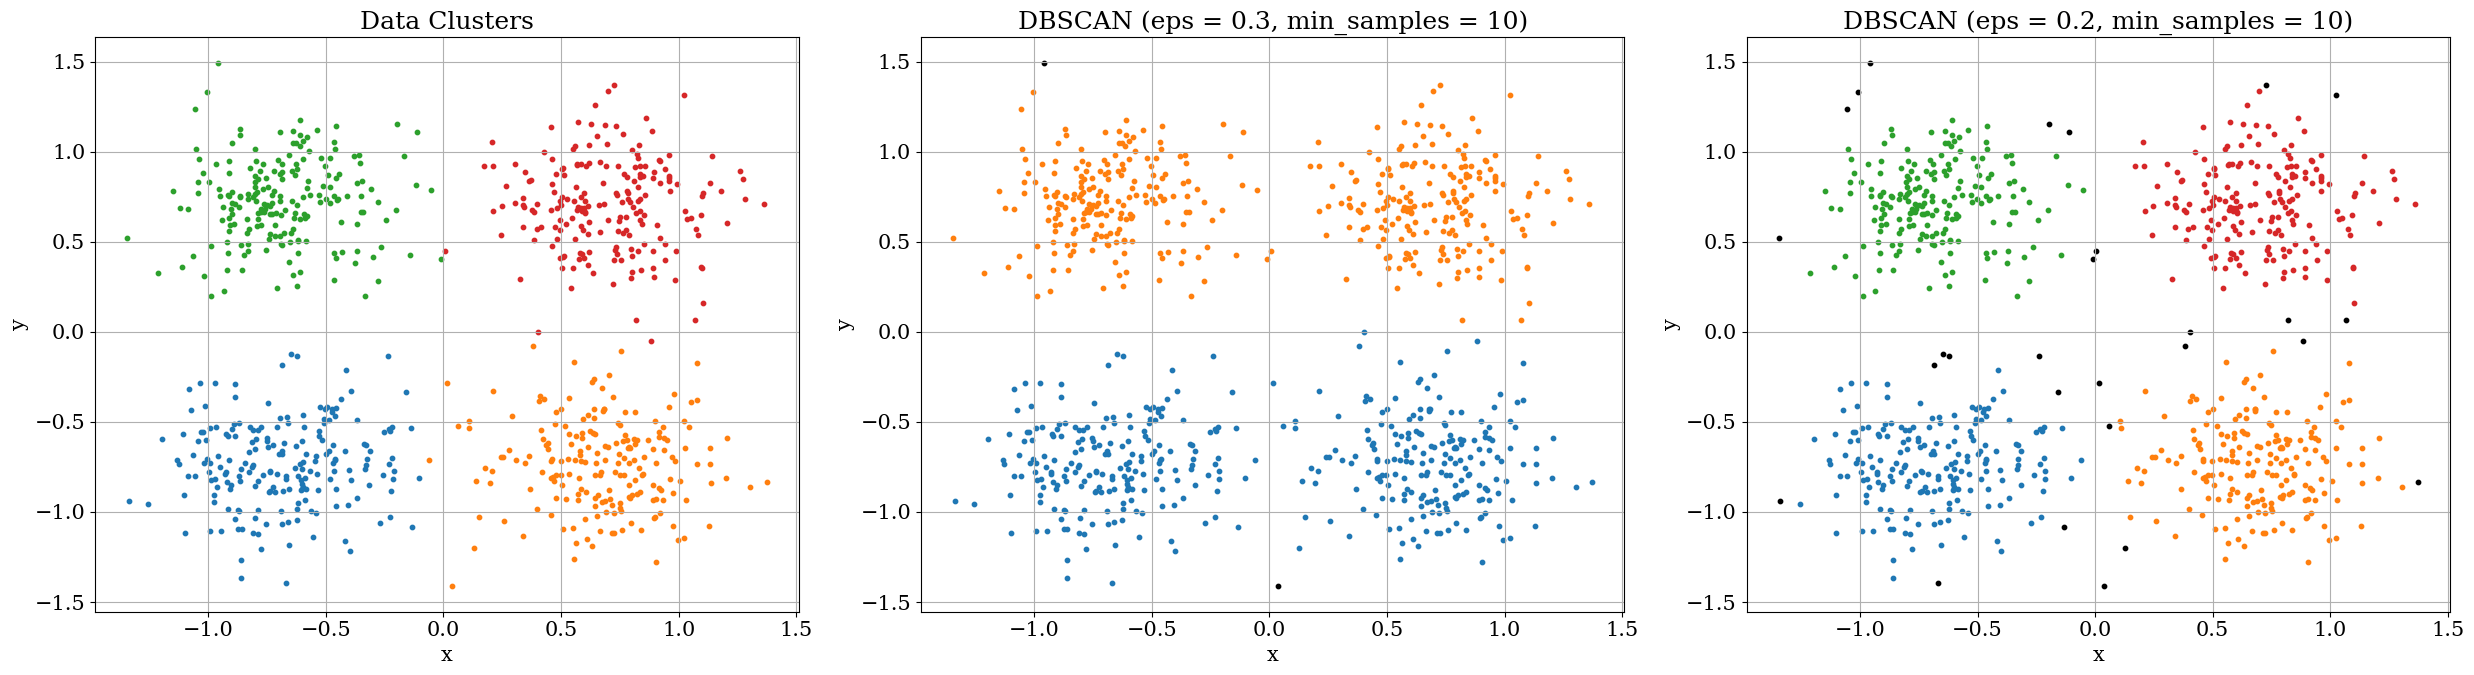

In [45]:
# Data clustered at [-1, 1], [-1, -1], [1, -1], [1, 1] as gaussians
np.random.seed(0)
x1 = np.random.normal(-0.7, 0.25, 200)
y1 = np.random.normal(-0.7, 0.25, 200)
x2 = np.random.normal(0.7, 0.25, 200)
y2 = np.random.normal(-0.7, 0.25, 200)
x3 = np.random.normal(-0.7, 0.25, 200)
y3 = np.random.normal(0.7, 0.25, 200)
x4 = np.random.normal(0.7, 0.25, 200)
y4 = np.random.normal(0.7, 0.25, 200)

fig, axes = plt.subplots(1, 3, figsize = (25, 7))
ax = axes[0]
ax.scatter(x1, y1, label = 'Cluster 1', s = 10)
ax.scatter(x2, y2, label = 'Cluster 2', s = 10)
ax.scatter(x3, y3, label = 'Cluster 3', s = 10)
ax.scatter(x4, y4, label = 'Cluster 4', s = 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.legend(fontsize = 10, loc = 'upper right')
ax.grid(True)
ax.set_title('Data Clusters')
# plt.savefig('clustered_data.png')

# Hierarchical clustering - Single Linkage
# X = np.vstack([np.hstack([x1, x2, x3, x4]), np.hstack([y1, y2, y3, y4])]).T
# clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'single').fit(X)
# labels = clustering.labels_

# ax = axes[1]
# ax.scatter(X[labels == 0, 0], X[labels == 0, 1], label = 'Cluster 1', s = 10)
# ax.scatter(X[labels == 1, 0], X[labels == 1, 1], label = 'Cluster 2', s = 10)
# ax.scatter(X[labels == 2, 0], X[labels == 2, 1], label = 'Cluster 3', s = 10)
# ax.scatter(X[labels == 3, 0], X[labels == 3, 1], label = 'Cluster 4', s = 10)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.legend(fontsize = 10, loc = 'upper right')
# ax.grid(True)
# ax.set_title('Hierarchical Clustering - Single Linkage')

# # Hierarchical clustering - Average Linkage
# clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'average').fit(X)
# labels = clustering.labels_

# ax = axes[2]
# ax.scatter(X[labels == 0, 0], X[labels == 0, 1], label = 'Cluster 1', s = 10)
# ax.scatter(X[labels == 1, 0], X[labels == 1, 1], label = 'Cluster 2', s = 10)
# ax.scatter(X[labels == 2, 0], X[labels == 2, 1], label = 'Cluster 3', s = 10)
# ax.scatter(X[labels == 3, 0], X[labels == 3, 1], label = 'Cluster 4', s = 10)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.legend(fontsize = 10, loc = 'upper right')
# ax.grid(True)
# ax.set_title('Hierarchical Clustering - Average Linkage')

# plt.tight_layout()
# # plt.savefig('hierarchical_clustering.png')

# KMeans clustering
# X = np.vstack([np.hstack([x1, x2, x3, x4]), np.hstack([y1, y2, y3, y4])]).T

# # Silhouette score
# from sklearn.metrics import silhouette_score
# silhouette_scores = []
# for i in range(2, 10):
#     kmeans = KMeans(n_clusters = i, random_state = 0).fit(X)
#     labels = kmeans.labels_
#     silhouette_scores.append(silhouette_score(X, labels))

# ax = axes[1]
# ax.plot(range(2, 10), silhouette_scores, marker = 'o')
# ax.set_xlabel('Number of Clusters')
# ax.set_ylabel('Silhouette Score')
# ax.grid(True)
# ax.set_title('Silhouette Score')

# # KMeans clustering
# kmeans = KMeans(n_clusters = 4, random_state = 0).fit(X)
# labels = kmeans.labels_

# ax = axes[2]
# ax.scatter(X[labels == 0, 0], X[labels == 0, 1], label = 'Cluster 1', s = 10)
# ax.scatter(X[labels == 1, 0], X[labels == 1, 1], label = 'Cluster 2', s = 10)
# ax.scatter(X[labels == 2, 0], X[labels == 2, 1], label = 'Cluster 3', s = 10)
# ax.scatter(X[labels == 3, 0], X[labels == 3, 1], label = 'Cluster 4', s = 10)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.legend(fontsize = 10, loc = 'upper right')
# ax.grid(True)
# ax.set_title('KMeans Clustering')

# plt.tight_layout()
# plt.savefig('kmeans_clustering.png')

# DBSCAN clustering
X = np.vstack([np.hstack([x1, x2, x3, x4]), np.hstack([y1, y2, y3, y4])]).T

# DBSCAN clustering
dbscan = DBSCAN(eps = 0.3, min_samples = 10).fit(X)
labels = dbscan.labels_

ax = axes[1]
for i in range(len(np.unique(labels))):
    ax.scatter(X[labels == i, 0], X[labels == i, 1], label = f'Cluster {i}', s = 10)
ax.scatter(X[labels == -1, 0], X[labels == -1, 1], label = 'Noise', s = 10, color = 'black')

ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.legend(fontsize = 10, loc = 'upper right')
ax.grid(True)
ax.set_title('DBSCAN (eps = 0.3, min_samples = 10)')

dbscan = DBSCAN(eps = 0.2, min_samples = 10).fit(X)
labels = dbscan.labels_

ax = axes[2]
for i in range(len(np.unique(labels))):
    ax.scatter(X[labels == i, 0], X[labels == i, 1], label = f'Cluster {i}', s = 10)
ax.scatter(X[labels == -1, 0], X[labels == -1, 1], label = 'Noise', s = 10, color = 'black')

ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.legend(fontsize = 10, loc = 'upper right')
ax.grid(True)
ax.set_title('DBSCAN (eps = 0.2, min_samples = 10)')

plt.tight_layout()
# plt.savefig('dbscan_clustering.png')